#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [2]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 2s 0us/step


Let's take a look at a sample of the images in the dataset:

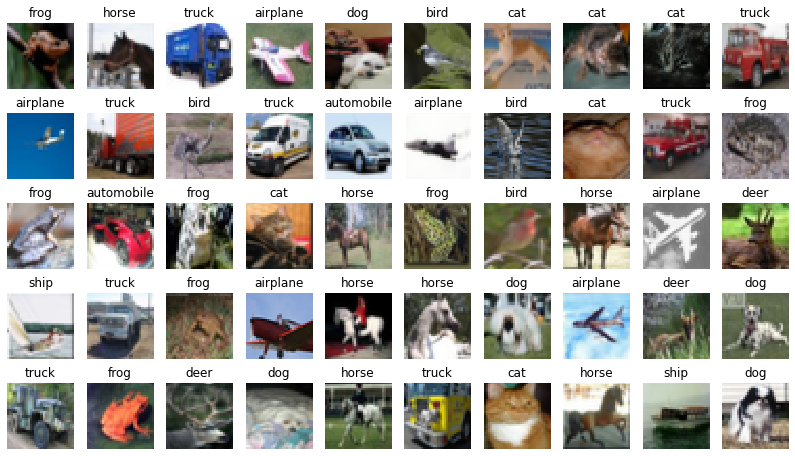

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

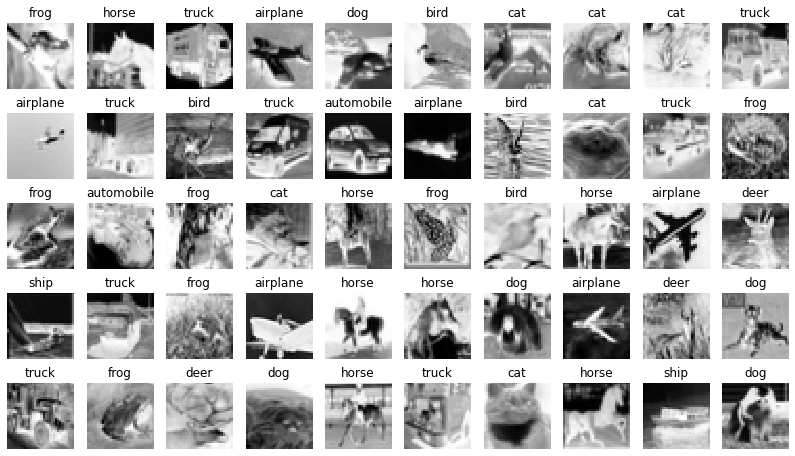

In [4]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)
import cv2

X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train]) #converting training
X_valid = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_valid]) #converting valid
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test]) #converting test

n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

X_train_mean = np.mean(X_train, axis = 0);
X_train_std = np.std(X_train, axis = 0);

X_train = (X_train - X_train_mean)/X_train_std;#[TO COMPLETE]
X_valid = (X_valid - X_train_mean)/X_train_std;#[TO COMPLETE]
X_test = (X_test - X_train_mean)/X_train_std;#[TO COMPLETE]


#Add one dimension to manage the channel if you are using grayscale images.
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32, 1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,250
Trainable params: 82,250
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 11s 5ms/step - loss: 1.6296 - accuracy: 0.4353 - val_loss: 1.3820 - val_accuracy: 0.5198
Epoch 2/10
352/352 [==============================] - 2s 4ms/step - loss: 1.3212 - accuracy: 0.5472 - val_loss: 1.2879 - val_accuracy: 0.5582
Epoch 3/10
352/352 [==============================] - 2s 4ms/step - loss: 1.2047 - accuracy: 0.5908 - val_loss: 1.2296 - val_accuracy: 0.5774
Epoch 4/10
352/352 [==============================] - 2s 4ms/step - loss: 1.1375 - accuracy: 0.6123 - val_loss: 1.2005 - val_accuracy: 0.5956
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0857 - accuracy: 0.6322 - val_loss: 1.2030 - val_accuracy: 0.5994
Epoch 6/10
352/352 [==============================] - 2s 4ms/step - loss: 1.0478 - accuracy: 0.6454 - val_loss: 1.1712 - val_accuracy: 0.6032
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0149 - accuracy: 0.6562 - val_loss: 1.1675 - val_accuracy: 0.6130
Epoch

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.1699 - accuracy: 0.6088 - 604ms/epoch - 2ms/step
accuracy: 60.88%


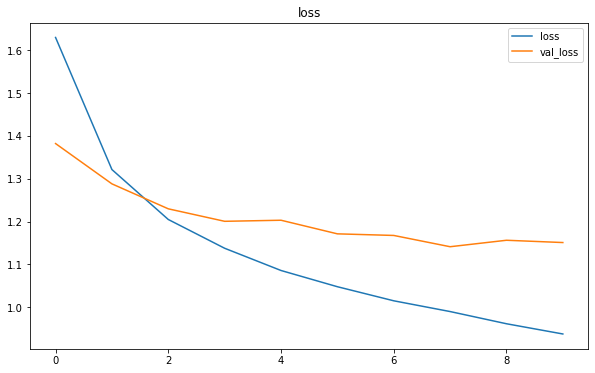

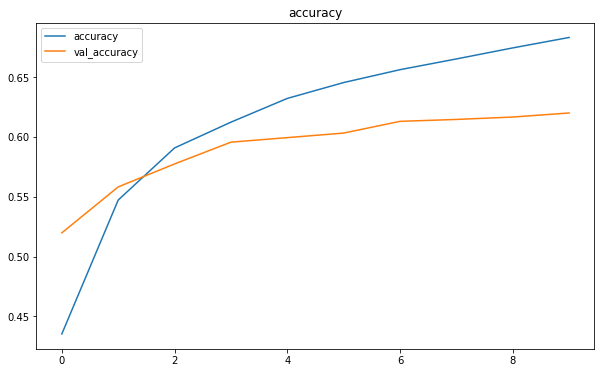

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

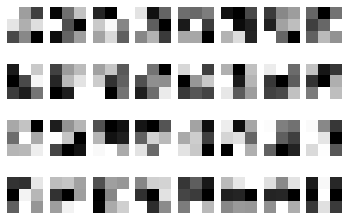

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] Answer to question 1:

 The number of parameters of the two Conv2D layers is determined according to:

 [#filters in the previous layer x (current layer size) + 1(the bias)] x (#filters in output).

 In the first one we have: [3 x (3 x 3) +1] x 32=896

 In the second one we have: [32 x (2 x 2) +1] x 16=2064

2.   [TO COMPLETE] Answer to question 2:

 The reason why the two convolutional layers have different numbers of parameters is that the first layer has size of (3 x 3), while the second has size of (2 x 2), also each layer has a different number of filters, 32 the first one, while 16 the second one.
 

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 2s 6ms/step - loss: 1.7331 - accuracy: 0.3914 - val_loss: 1.4830 - val_accuracy: 0.4852
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.4152 - accuracy: 0.5133 - val_loss: 1.3449 - val_accuracy: 0.5426
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.2953 - accuracy: 0.5571 - val_loss: 1.2406 - val_accuracy: 0.5778
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.2166 - accuracy: 0.5864 - val_loss: 1.1928 - val_accuracy: 0.5946
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1690 - accuracy: 0.6025 - val_loss: 1.1600 - val_accuracy: 0.6012
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1345 - accuracy: 0.6152 - val_loss: 1.1260 - val_accuracy: 0.6116
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1054 - accuracy: 0.6256 - val_loss: 1.1174 - val_accuracy: 0.6186
Epoch 

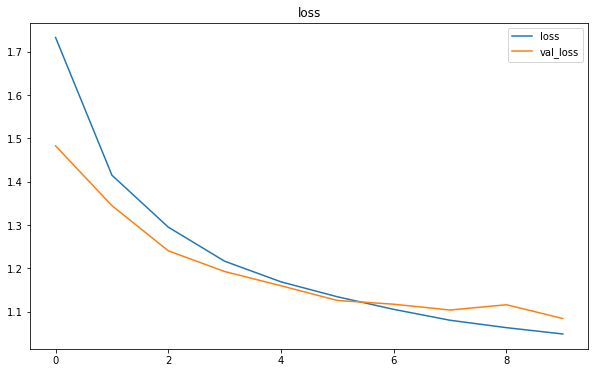

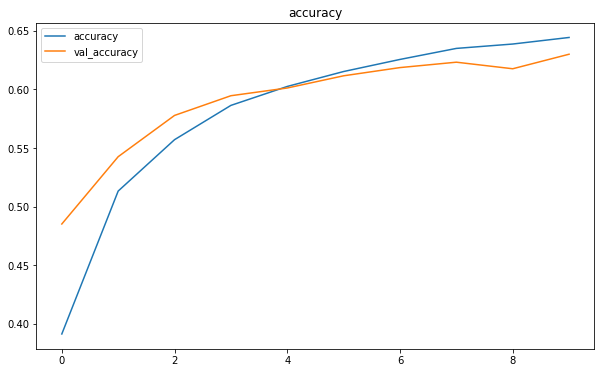

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [12]:
#[TO COMPLETE]
#CHANGE NUMBER OF LAYERS AND INCREASED THE NUMBER OF PARAMETERS
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[32, 32,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=128, kernel_size=[4,4], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       262272    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 128)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)        

In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 7s 16ms/step - loss: 1.6513 - accuracy: 0.4095 - val_loss: 1.2797 - val_accuracy: 0.5580
Epoch 2/10
352/352 [==============================] - 5s 16ms/step - loss: 1.2408 - accuracy: 0.5679 - val_loss: 1.0995 - val_accuracy: 0.6320
Epoch 3/10
352/352 [==============================] - 5s 15ms/step - loss: 1.0811 - accuracy: 0.6225 - val_loss: 0.9636 - val_accuracy: 0.6718
Epoch 4/10
352/352 [==============================] - 5s 16ms/step - loss: 0.9848 - accuracy: 0.6584 - val_loss: 0.9260 - val_accuracy: 0.6758
Epoch 5/10
352/352 [==============================] - 6s 16ms/step - loss: 0.9144 - accuracy: 0.6822 - val_loss: 0.8660 - val_accuracy: 0.7062
Epoch 6/10
352/352 [==============================] - 6s 16ms/step - loss: 0.8619 - accuracy: 0.6997 - val_loss: 0.8313 - val_accuracy: 0.7180
Epoch 7/10
352/352 [==============================] - 6s 16ms/step - loss: 0.8244 - accuracy: 0.7125 - val_loss: 0.8057 - val_accuracy: 0.7286

313/313 - 1s - loss: 0.7714 - accuracy: 0.7376 - 993ms/epoch - 3ms/step
 accuracy: 73.76%
----------------------------


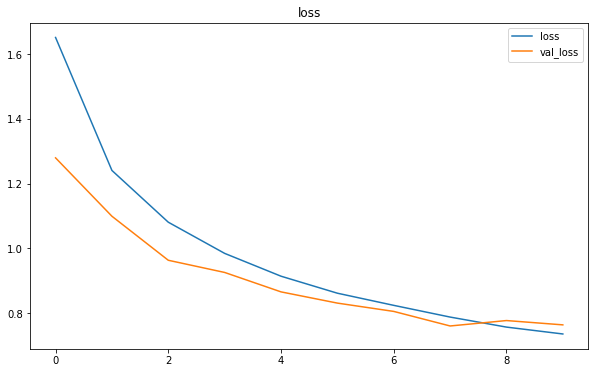

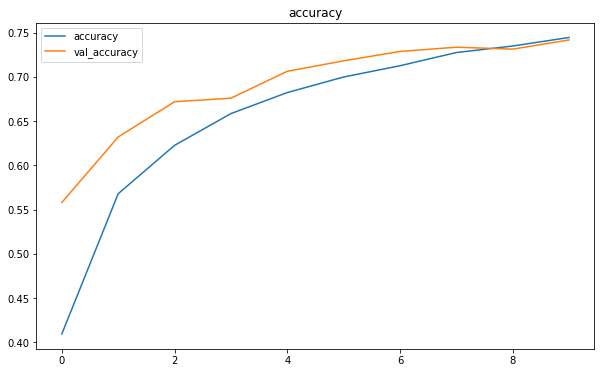

In [14]:
plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
#[TO COMPLETE]
#CHANGE ACTIVATION FUNCTION
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='sigmoid', input_shape=[32, 32,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='sigmoid'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128,
                  validation_data=(X_valid, y_valid))

Epoch 1/50
352/352 [==============================] - 32s 91ms/step - loss: 2.0226 - accuracy: 0.2706 - val_loss: 1.8120 - val_accuracy: 0.3622
Epoch 2/50
352/352 [==============================] - 32s 92ms/step - loss: 1.7535 - accuracy: 0.3838 - val_loss: 1.6791 - val_accuracy: 0.4000
Epoch 3/50
352/352 [==============================] - 32s 92ms/step - loss: 1.6503 - accuracy: 0.4198 - val_loss: 1.5901 - val_accuracy: 0.4370
Epoch 4/50
352/352 [==============================] - 32s 91ms/step - loss: 1.5719 - accuracy: 0.4478 - val_loss: 1.5219 - val_accuracy: 0.4608
Epoch 5/50
352/352 [==============================] - 32s 90ms/step - loss: 1.5050 - accuracy: 0.4718 - val_loss: 1.4616 - val_accuracy: 0.4908
Epoch 6/50
352/352 [==============================] - 32s 91ms/step - loss: 1.4441 - accuracy: 0.4945 - val_loss: 1.4407 - val_accuracy: 0.4906
Epoch 7/50
352/352 [==============================] - 32s 91ms/step - loss: 1.3925 - accuracy: 0.5114 - val_loss: 1.3811 - val_accuracy:

313/313 - 2s - loss: 0.9675 - accuracy: 0.6635 - 2s/epoch - 8ms/step
 accuracy: 66.35%
----------------------------


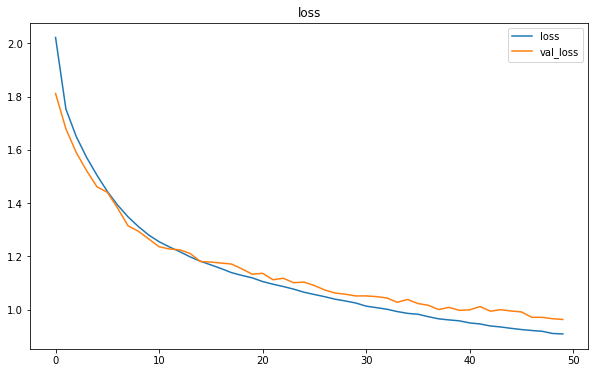

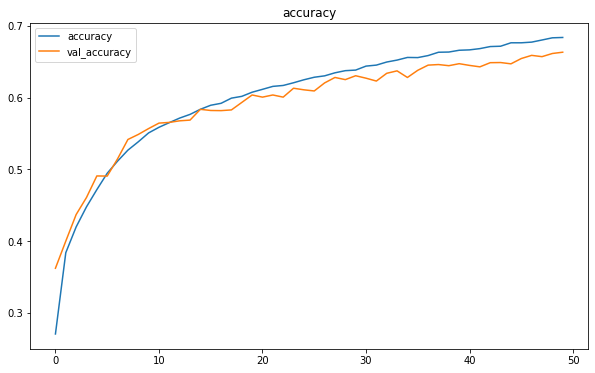

In [ ]:
plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
#[TO COMPLETE]
#CHANGE EPOCHS
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128,
                  validation_data=(X_valid, y_valid))

Epoch 1/50
352/352 [==============================] - 36s 100ms/step - loss: 1.6151 - accuracy: 0.4225 - val_loss: 1.3361 - val_accuracy: 0.5338
Epoch 2/50
352/352 [==============================] - 32s 92ms/step - loss: 1.2802 - accuracy: 0.5505 - val_loss: 1.2132 - val_accuracy: 0.5722
Epoch 3/50
352/352 [==============================] - 33s 93ms/step - loss: 1.1818 - accuracy: 0.5878 - val_loss: 1.1474 - val_accuracy: 0.6014
Epoch 4/50
352/352 [==============================] - 33s 94ms/step - loss: 1.1132 - accuracy: 0.6119 - val_loss: 1.1096 - val_accuracy: 0.6180
Epoch 5/50
352/352 [==============================] - 33s 94ms/step - loss: 1.0689 - accuracy: 0.6296 - val_loss: 1.1056 - val_accuracy: 0.6128
Epoch 6/50
352/352 [==============================] - 33s 95ms/step - loss: 1.0257 - accuracy: 0.6459 - val_loss: 1.0621 - val_accuracy: 0.6298
Epoch 7/50
352/352 [==============================] - 33s 94ms/step - loss: 0.9977 - accuracy: 0.6558 - val_loss: 1.0233 - val_accuracy

313/313 - 2s - loss: 0.9430 - accuracy: 0.6756 - 2s/epoch - 7ms/step
 accuracy: 67.56%
----------------------------


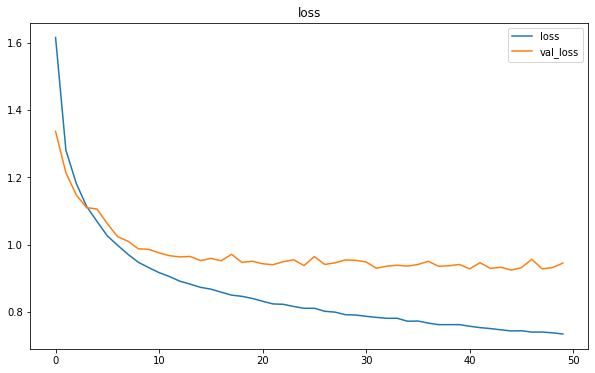

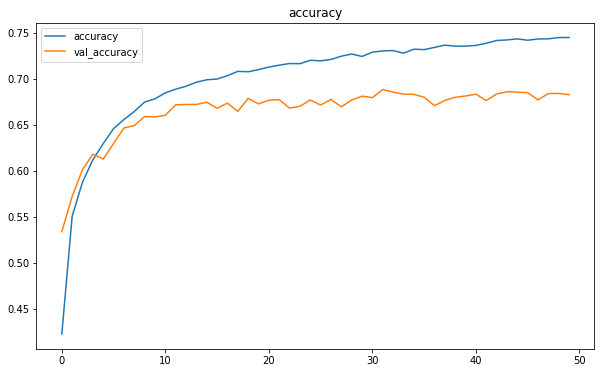

In [ ]:
plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
#[TO COMPLETE]
#CHANGE BATCH SIZE
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=256,
                  validation_data=(X_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 32s 177ms/step - loss: 1.7342 - accuracy: 0.3812 - val_loss: 1.4698 - val_accuracy: 0.4786
Epoch 2/10
176/176 [==============================] - 30s 173ms/step - loss: 1.3662 - accuracy: 0.5170 - val_loss: 1.2824 - val_accuracy: 0.5558
Epoch 3/10
176/176 [==============================] - 30s 172ms/step - loss: 1.2554 - accuracy: 0.5609 - val_loss: 1.2191 - val_accuracy: 0.5760
Epoch 4/10
176/176 [==============================] - 30s 172ms/step - loss: 1.1891 - accuracy: 0.5849 - val_loss: 1.1652 - val_accuracy: 0.5990
Epoch 5/10
176/176 [==============================] - 30s 173ms/step - loss: 1.1305 - accuracy: 0.6068 - val_loss: 1.1246 - val_accuracy: 0.6158
Epoch 6/10
176/176 [==============================] - 30s 172ms/step - loss: 1.0870 - accuracy: 0.6229 - val_loss: 1.0986 - val_accuracy: 0.6150
Epoch 7/10
176/176 [==============================] - 30s 172ms/step - loss: 1.0500 - accuracy: 0.6364 - val_loss: 1.0666 - val_ac

313/313 - 2s - loss: 1.0281 - accuracy: 0.6420 - 2s/epoch - 8ms/step
 accuracy: 64.20%
----------------------------


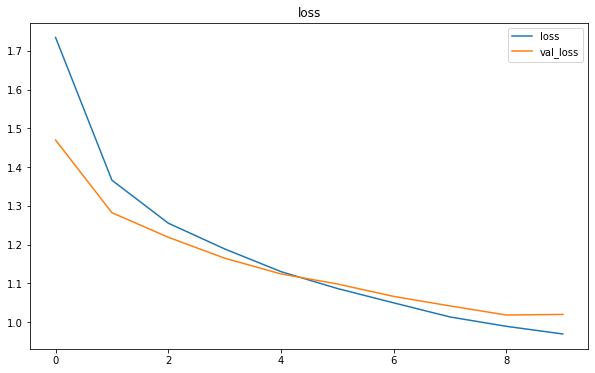

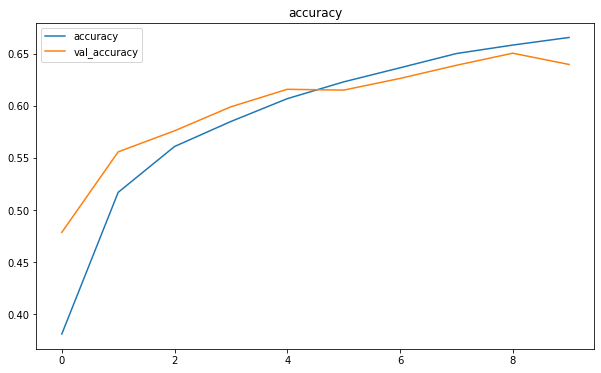

In [ ]:
plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
#[TO COMPLETE]
#CHANGE OPTIMIZER
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 34s 94ms/step - loss: 2.0255 - accuracy: 0.2684 - val_loss: 1.8179 - val_accuracy: 0.3552
Epoch 2/10
352/352 [==============================] - 36s 101ms/step - loss: 1.7081 - accuracy: 0.3950 - val_loss: 1.6058 - val_accuracy: 0.4368
Epoch 3/10
352/352 [==============================] - 31s 88ms/step - loss: 1.5625 - accuracy: 0.4433 - val_loss: 1.5100 - val_accuracy: 0.4734
Epoch 4/10
352/352 [==============================] - 31s 89ms/step - loss: 1.4790 - accuracy: 0.4756 - val_loss: 1.4522 - val_accuracy: 0.4896
Epoch 5/10
352/352 [==============================] - 31s 89ms/step - loss: 1.4166 - accuracy: 0.4986 - val_loss: 1.4075 - val_accuracy: 0.5032
Epoch 6/10
352/352 [==============================] - 32s 90ms/step - loss: 1.3679 - accuracy: 0.5207 - val_loss: 1.3510 - val_accuracy: 0.5264
Epoch 7/10
352/352 [==============================] - 31s 89ms/step - loss: 1.3302 - accuracy: 0.5336 - val_loss: 1.3197 - val_accuracy

313/313 - 2s - loss: 1.2628 - accuracy: 0.5579 - 2s/epoch - 7ms/step
 accuracy: 55.79%
----------------------------


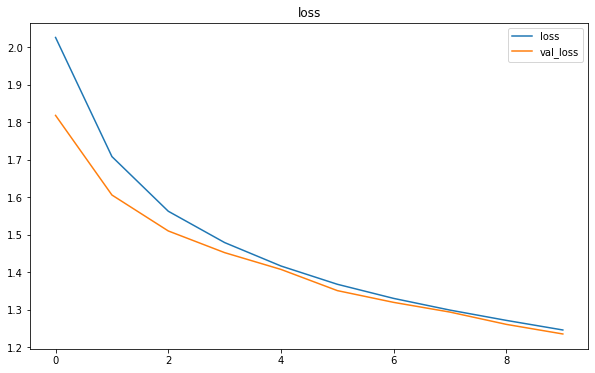

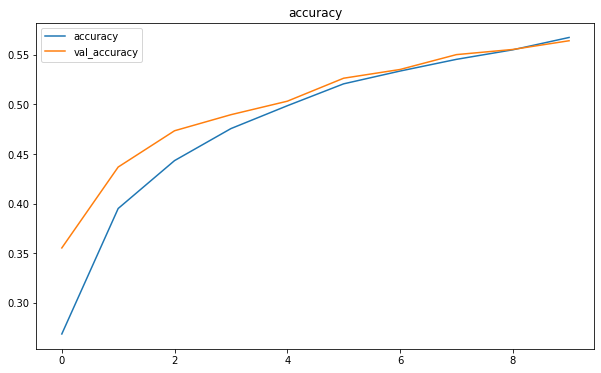

In [ ]:
plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

In [ ]:
#[TO COMPLETE]
#CHANGE POOLING SIZE and ON/OFF POOLING
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,1]),
    keras.layers.MaxPool2D(pool_size=[4,4]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(4,4)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 16)        2064      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 10,810
Trainable params: 10,810
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 49s 138ms/step - loss: 1.5836 - accuracy: 0.4387 - val_loss: 1.3073 - val_accuracy: 0.5480
Epoch 2/10
352/352 [==============================] - 44s 125ms/step - loss: 1.2568 - accuracy: 0.5581 - val_loss: 1.2036 - val_accuracy: 0.5782
Epoch 3/10
352/352 [==============================] - 44s 125ms/step - loss: 1.1441 - accuracy: 0.6027 - val_loss: 1.1225 - val_accuracy: 0.6118
Epoch 4/10
352/352 [==============================] - 44s 126ms/step - loss: 1.0774 - accuracy: 0.6250 - val_loss: 1.0764 - val_accuracy: 0.6276
Epoch 5/10
352/352 [==============================] - 45s 127ms/step - loss: 1.0308 - accuracy: 0.6435 - val_loss: 1.0413 - val_accuracy: 0.6364
Epoch 6/10
352/352 [==============================] - 44s 125ms/step - loss: 1.0041 - accuracy: 0.6509 - val_loss: 1.0201 - val_accuracy: 0.6496
Epoch 7/10
352/352 [==============================] - 44s 125ms/step - loss: 0.9805 - accuracy: 0.6606 - val_loss: 1.0087 - val_ac

313/313 - 3s - loss: 1.0349 - accuracy: 0.6360 - 3s/epoch - 10ms/step
 accuracy: 63.60%
----------------------------


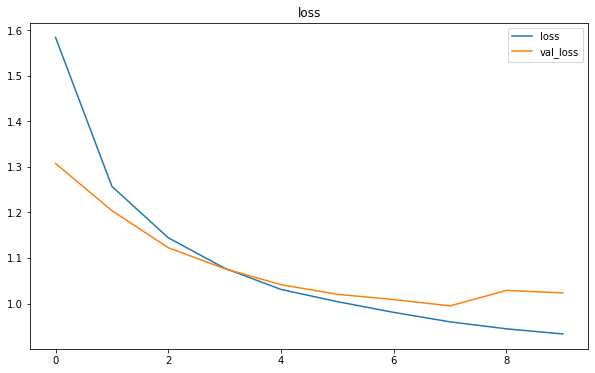

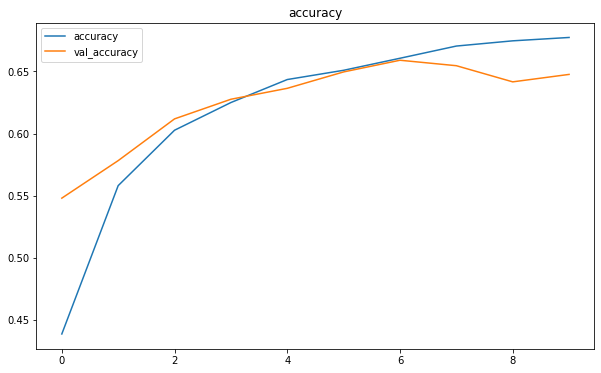

In [ ]:
plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found ...[TO COMPLETE]

The achieved accuracy in the test set is ...[TO COMPLETE]

Discussion:
[TO COMPLETE]

Besides, I tested also other models: 
* [TO COMPLETE]
* ..


Discussion:
[TO COMPLETE]